In [2]:
import patato as pat
import matplotlib.pyplot as plt
import numpy as np

/opt/anaconda3/envs/paiskintone/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
padata = pat.PAData.from_hdf5("Data/19_5.hdf5")[:, :]

In [4]:
image_data = np.squeeze(
    padata.get_scan_reconstructions()["Model Based", "0"].raw_data
)

In [5]:
image_data.shape

(13, 400, 400)

In [6]:
wavelengths = np.linspace(700, 1100, 13)
melanin = 519 * (wavelengths / 500) ** (-3.5) * 0.4

In [28]:
# plt.plot(wavelengths, melanin)
# plt.title("Melanin Spectrum")

In [16]:
image_flat = image_data.reshape(13, -1)
print(image_flat.shape)
print(melanin.shape)

(13, 160000)
(13,)


In [21]:
projection_flat = image_flat * np.dot(melanin, image_flat) / np.linalg.norm(melanin)

In [22]:
projection = projection_flat.reshape(13, 400, 400)

In [32]:
# Calculate subtraction (in theory, PAI without mUS clutter)
pai = image_data - projection

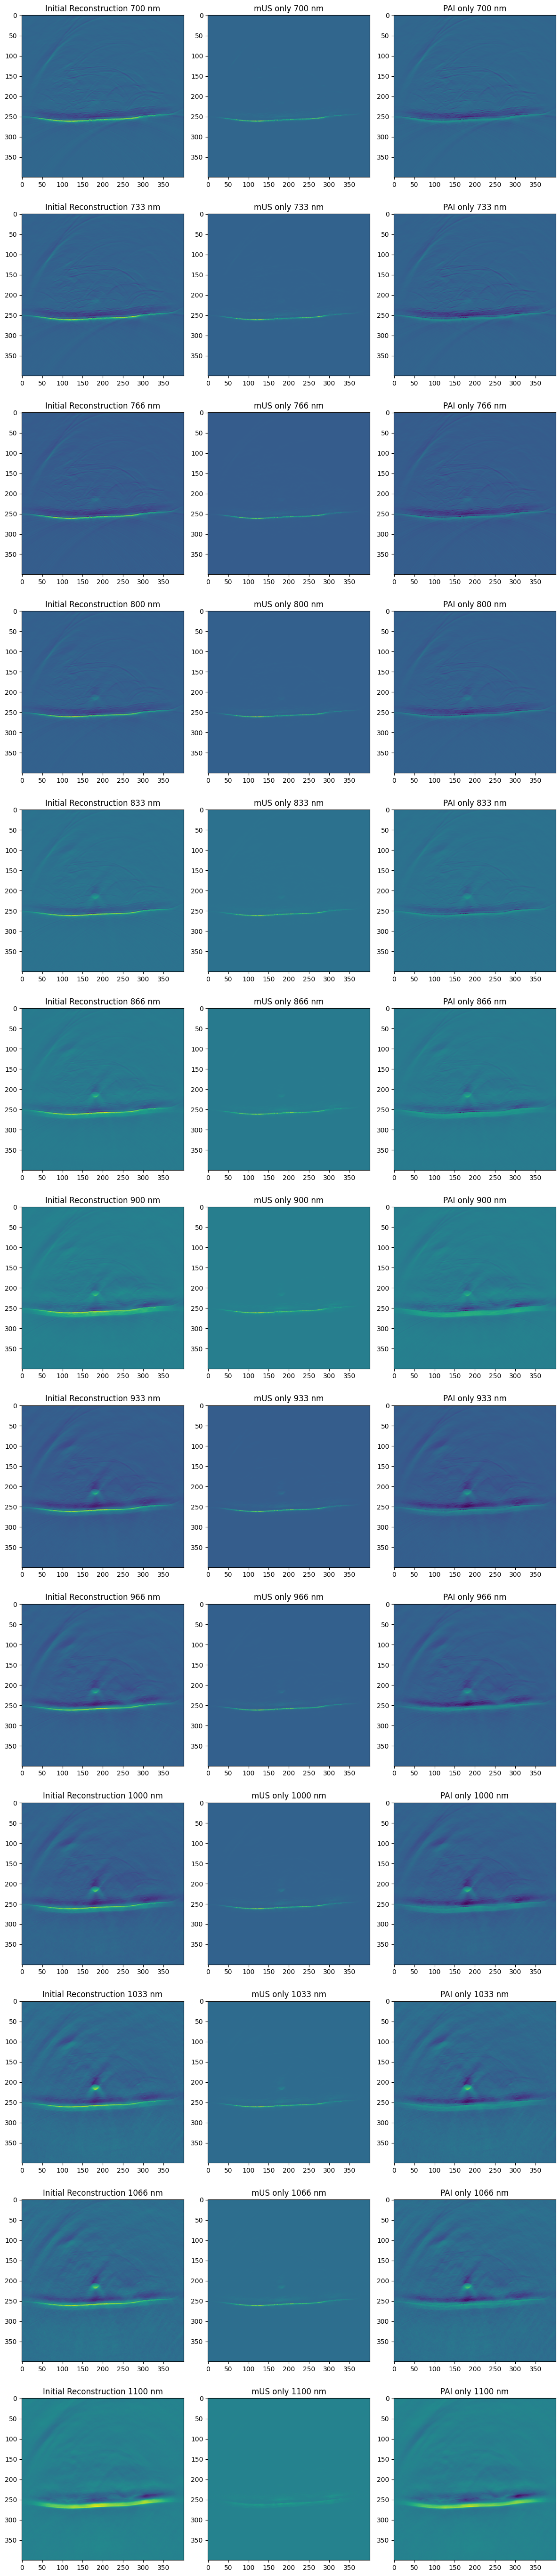

In [44]:
fig, ax = plt.subplots(13, 3, figsize=(12, 55))

for i in range(13):
    # Compute common color scale for this row
    vmin = min(image_data[i].min(), projection[i].min(), pai[i].min())
    vmax = max(image_data[i].max(), projection[i].max(), pai[i].max())

    # Plot PAI full
    im0 = ax[i, 0].imshow(image_data[i], cmap='viridis', vmin=vmin, vmax=vmax)
    ax[i, 0].set_title(f"Initial Reconstruction {int(wavelengths[i])} nm")

    # Plot mUS only
    im1 = ax[i, 1].imshow(projection[i], cmap='viridis', vmin=vmin, vmax=vmax)
    ax[i, 1].set_title(f"mUS only {int(wavelengths[i])} nm")

    # Plot PAI only
    im2 = ax[i, 2].imshow(pai[i], cmap='viridis', vmin=vmin, vmax=vmax)
    ax[i, 2].set_title(f"PAI only {int(wavelengths[i])} nm")

plt.tight_layout()
plt.show()
